In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
#导入相关文件
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
df = pd.read_csv("../data/data.csv")

print(df.head())
print(train.head())

def convert_to_timestamp(tm,begin):
    timeArray1 = time.strptime(tm, "%Y-%m-%d") 
    timeStamp1 = int(time.mktime(timeArray1))
    
    timeArray2 = time.strptime(begin, "%Y-%m-%d") 
    timeStamp2 = int(time.mktime(timeArray2))
    
    return int((timeStamp1 - timeStamp2)/3600/24)

#计算距离第一天的天数
df['distance'] = df['time'].apply(lambda x: convert_to_timestamp(x,"2015-12-01"))
train['distance'] = train['time'].apply(lambda x: convert_to_timestamp(x,"2015-12-01"))

      kind        time  cnt  kind_num
0  flavor1  2015-12-01    3         1
1  flavor1  2015-12-02    6         1
2  flavor1  2015-12-03    2         1
3  flavor1  2015-12-04    2         1
4  flavor1  2015-12-06    3         1
      kind        time  cnt  kind_num
0  flavor1  2015-12-01    3         1
1  flavor1  2015-12-02    6         1
2  flavor1  2015-12-03    2         1
3  flavor1  2015-12-04    2         1
4  flavor1  2015-12-06    3         1


In [3]:
# 定义开始和结束的时间
begin_time = convert_to_timestamp("2015-12-01","2015-12-01")
end_time = convert_to_timestamp("2016-01-24","2015-12-01")

#将时间信息补全
train_df = pd.DataFrame()
kind_of_flavor = train['kind'].unique().tolist()

for kind in kind_of_flavor:
    one_flavor = train[train['kind'] == kind]
    for day in list(range(end_time - 7 + 1)):
        one_flavor_some_day = one_flavor[(one_flavor['distance'] >= day) & (one_flavor['distance'] < day+7) ][['kind','cnt']]
        if(len(one_flavor_some_day) == 0):
            one_flavor_some_day = pd.DataFrame({'kind':[kind],'cnt':[0]})
        else:
            one_flavor_some_day = one_flavor_some_day.groupby(['kind']).sum().reset_index()
        one_flavor_some_day['distance'] = day
        train_df = train_df.append(one_flavor_some_day, ignore_index=True)

/home/chenxl/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


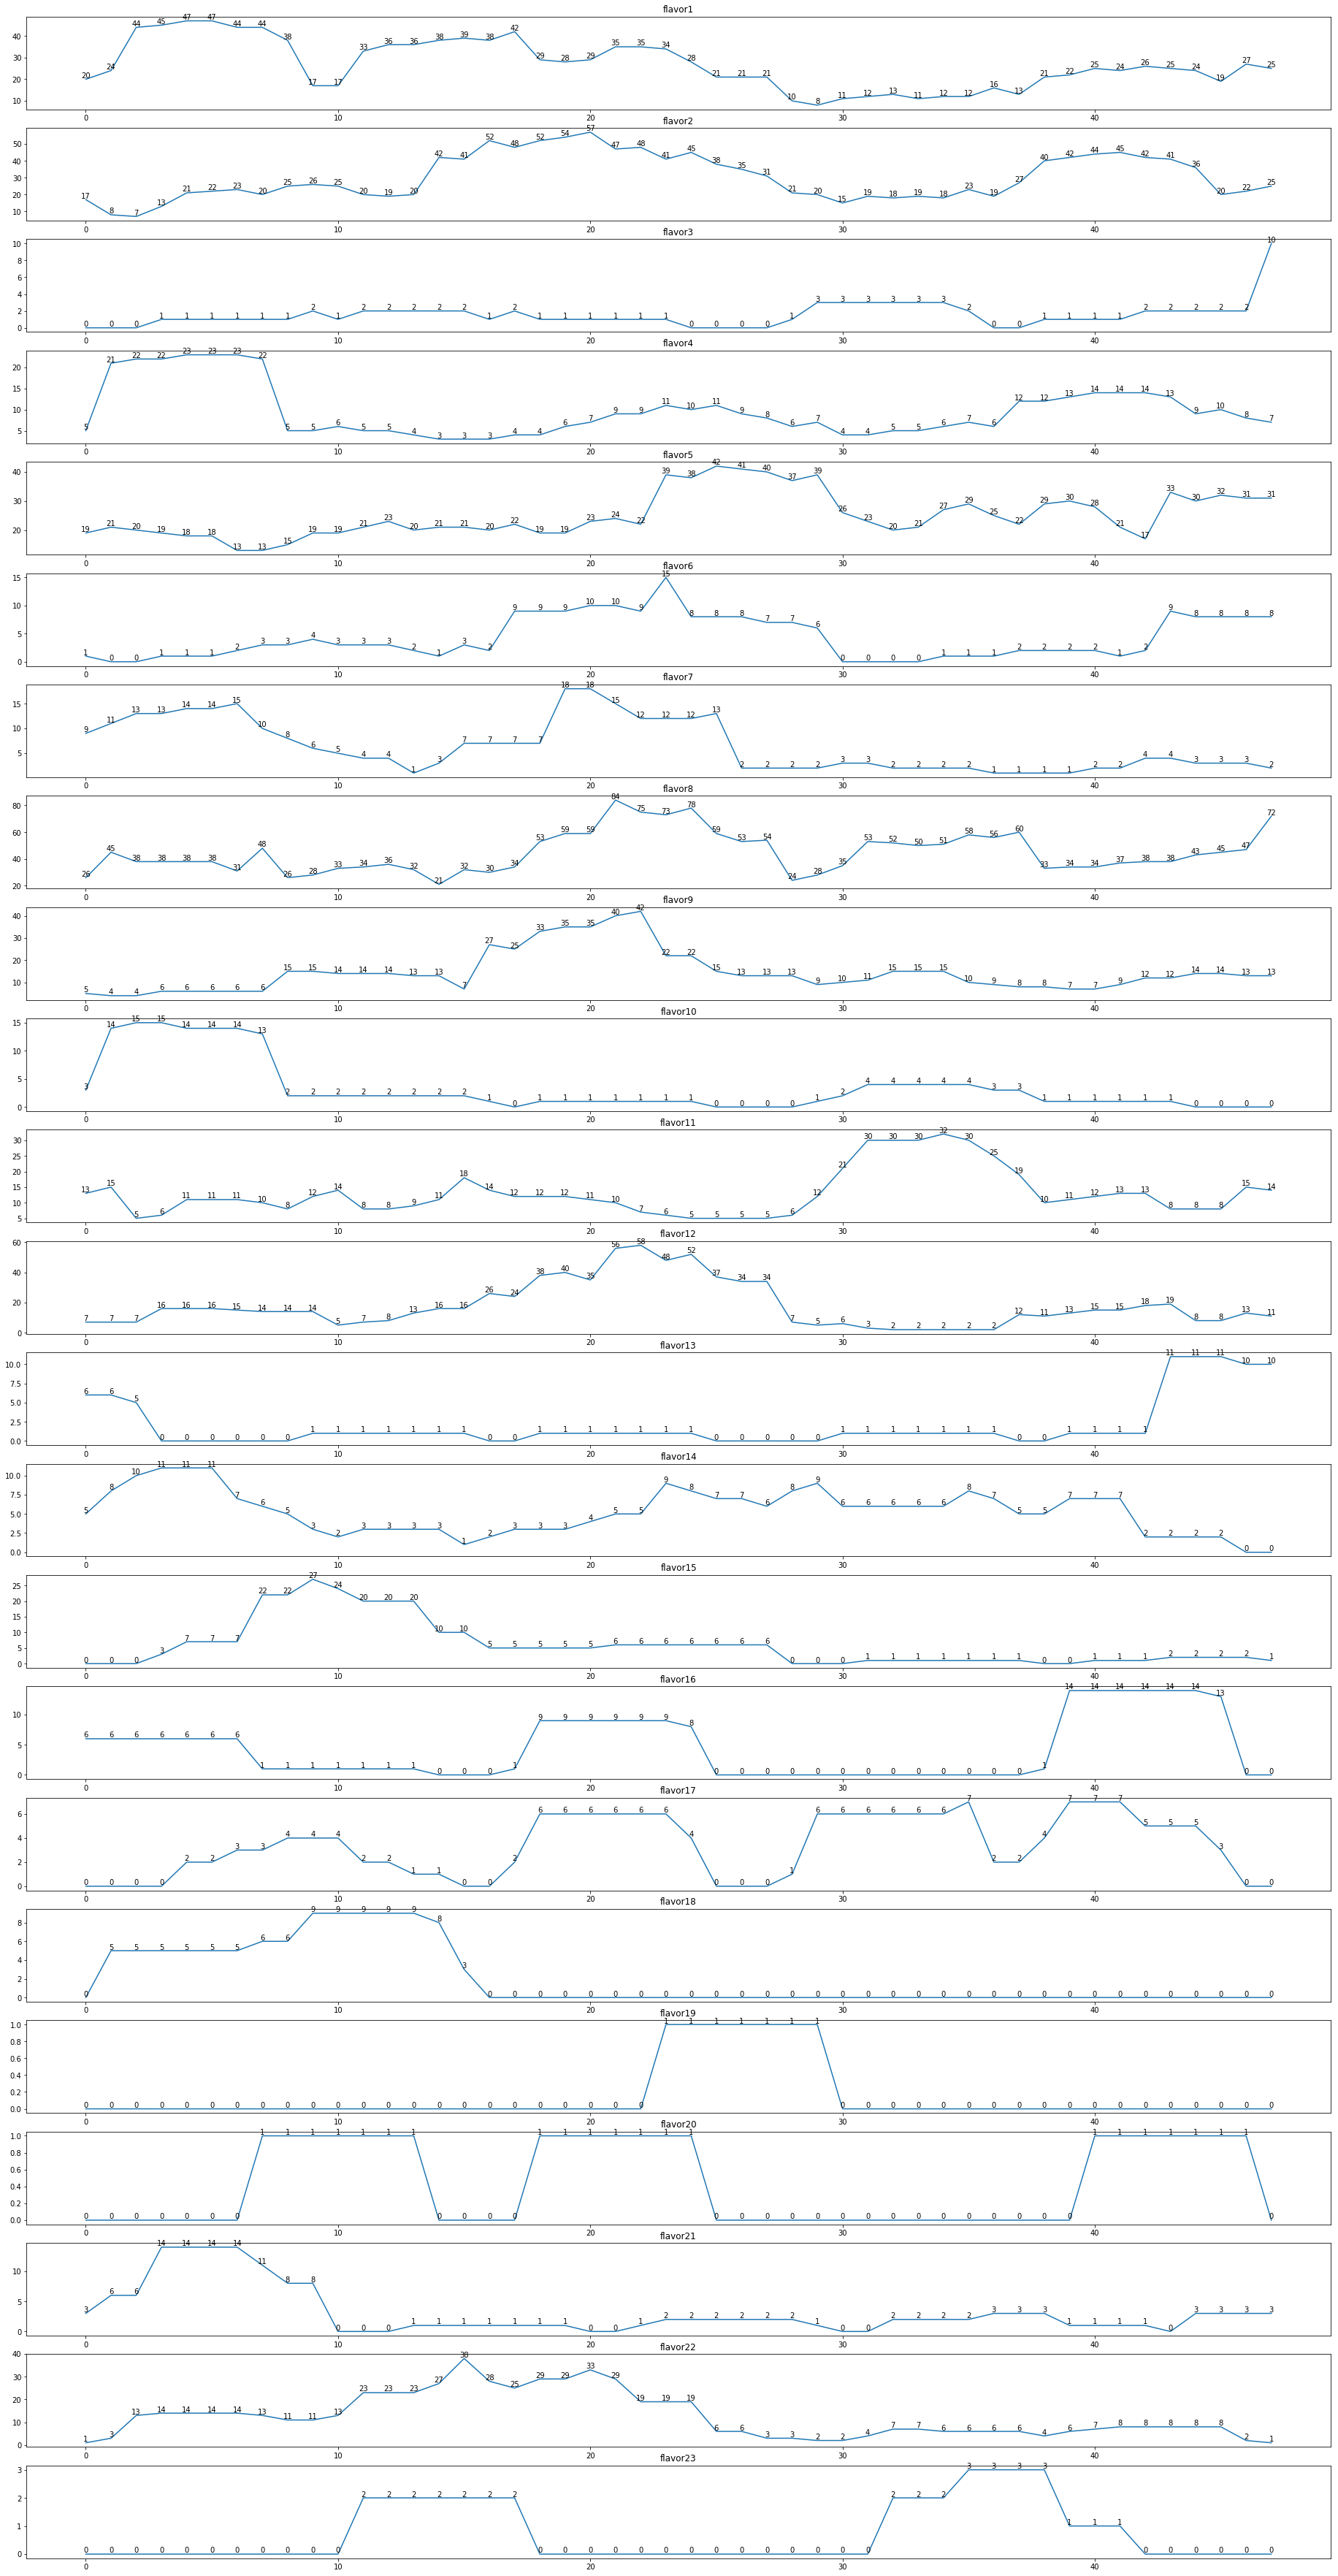

In [4]:
flavor_kind = train_df['kind'].unique().tolist()

plt.subplots(nrows=len(flavor_kind), ncols=1,figsize=(32,64))
val = 1
for flavor in flavor_kind:
    plt.subplot(len(flavor_kind),1,val)
    plt.plot(train_df[train_df['kind'] == flavor]['distance'],train_df[train_df['kind'] == flavor]['cnt'],label = flavor)
    for x, y in zip(train_df[train_df['kind'] == flavor]['distance'],train_df[train_df['kind'] == flavor]['cnt']):
        plt.text(x, y, '%d' % y,ha = 'center', va = 'bottom')
    plt.title(flavor)
    val += 1

In [5]:
(1/2+1/3+1/4+1/5+1/6+1/7+1/8+1/9+1/10+1/11)/2

1.0099386724386725

In [6]:
sum = 0
for i in range(30):
    sum = sum + 1/(i+2)
sum/3

1.0090817318121734

目前对距离有两种方法，如上，可以验证哪一种更好

In [7]:
#第一种方法
#将时间信息补全
predict = pd.DataFrame()

for kind in kind_of_flavor:
    one_flavor = train_df[train_df['kind'] == kind]
    max_day = one_flavor['distance'].max()
    pre_sum = 0.0
    for i in range(10):
        pre_sum = pre_sum + float(one_flavor[one_flavor['distance'] == max_day - i]['cnt']) / (i+2) / 2
    predict = predict.append(pd.DataFrame({'kind':[kind],'cnt':[int(pre_sum+0.5)]}) , ignore_index=True)
    
predict.columns = ['predict', 'kind']
#合并 
result = pd.merge(predict,test,how='left',on='kind')
result = result.fillna(0)
result['cnt'] = result['cnt'].astype(np.int64)

print(result)

    predict      kind  cnt
0        24   flavor1   23
1        32   flavor2   14
2         4   flavor3    3
3        10   flavor4   11
4        30   flavor5   29
5         6   flavor6    2
6         3   flavor7    6
7        49   flavor8   27
8        12   flavor9   11
9         0  flavor10    3
10       12  flavor11   15
11       13  flavor12    9
12        8  flavor13    2
13        2  flavor14    5
14        1  flavor15    3
15        8  flavor16    0
16        3  flavor17    0
17        0  flavor18    0
18        0  flavor19    0
19        1  flavor20    1
20        2  flavor21    1
21        5  flavor22    0
22        0  flavor23    0


In [8]:
#第二种方法
#将时间信息补全
predict_two = pd.DataFrame()

for kind in kind_of_flavor:
    one_flavor = train_df[train_df['kind'] == kind]
    max_day = one_flavor['distance'].max()
    pre_sum = 0.0
    for i in range(30):
        pre_sum = pre_sum + float(one_flavor[one_flavor['distance'] == max_day - i]['cnt']) / (i+2) / 3
    predict_two = predict_two.append(pd.DataFrame({'kind':[kind],'cnt':[int(pre_sum+0.5)]}) , ignore_index=True)
    
predict_two.columns = ['predict', 'kind']
#合并 
result_two = pd.merge(predict_two,test,how='left',on='kind')
result_two = result_two.fillna(0)
result_two['cnt'] = result_two['cnt'].astype(np.int64)

result_two

,predict,kind,cnt
0,22,flavor1,23
1,31,flavor2,14
2,3,flavor3,3
3,9,flavor4,11
4,29,flavor5,29
5,6,flavor6,2
6,4,flavor7,6
7,51,flavor8,27
8,14,flavor9,11
9,1,flavor10,3


In [9]:
result['temp'] = 0
from sklearn.metrics import mean_squared_error

cnt_rmse = np.sqrt(mean_squared_error(result['cnt'],result['temp']))
pre_rmse = np.sqrt(mean_squared_error(result['predict'],result['temp']))
rmse = np.sqrt(mean_squared_error(result['cnt'],result['predict']))
tic1 = 1 - rmse/(cnt_rmse + pre_rmse )

pre_rmse_two = np.sqrt(mean_squared_error(result_two['predict'],result['temp']))
rmse_two = np.sqrt(mean_squared_error(result_two['cnt'],result_two['predict']))

tic2 = 1 - rmse_two/(cnt_rmse + pre_rmse_two)

In [10]:
print(tic1)
print(tic2)

0.75370161428793
0.7517390802958333
